<a href="https://colab.research.google.com/github/luisdixz/DA-depression-dataset/blob/main/Proyecto_analisis_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importación de datos

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Preparación del dataset

In [ ]:
df = pd.read_csv("student_depression_dataset.csv", index_col=0)
df.head()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
id,,,,,,,,,,,,,,,,,
2,Male,33,Visakhapatnam,Student,5,0,8.97,2,0,'5-6 hours',Healthy,B.Pharm,Yes,3,1,No,1
8,Female,24,Bangalore,Student,2,0,5.90,5,0,'5-6 hours',Moderate,BSc,No,3,2,Yes,0
26,Male,31,Srinagar,Student,3,0,7.03,5,0,'Less than 5 hours',Healthy,BA,No,9,1,Yes,0
30,Female,28,Varanasi,Student,3,0,5.59,2,0,'7-8 hours',Moderate,BCA,Yes,4,5,Yes,1
32,Female,25,Jaipur,Student,4,0,8.13,3,0,'5-6 hours',Moderate,M.Tech,Yes,1,1,No,0


In [ ]:
print(df.index.is_unique)

True


### Renombrar encabezados

In [ ]:
df.rename(
    columns={
        'Academic Pressure': 'Academic_Pressure',
        'Work Pressure': 'Work_Pressure',
        'Study Satisfaction': 'Study_Satisfaction',
        'Job Satisfaction': 'Job_Satisfaction',
        'Sleep Duration': 'Sleep_Duration',
        'Dietary Habits': 'Dietary_Habits',
        'Have you ever had suicidal thoughts ?': 'Suicidal_Thoughts',
        'Work/Study Hours': 'Work/Study_Hours',
        'Financial Stress': 'Financial_Stress',
        'Family History of Mental Illness': 'Family_HMI'
    },
    inplace = True
)
df.head()

,Gender,Age,City,Profession,Academic_Pressure,Work_Pressure,CGPA,Study_Satisfaction,Job_Satisfaction,Sleep_Duration,Dietary_Habits,Degree,Suicidal_Thoughts,Work/Study_Hours,Financial_Stress,Family_HMI,Depression
id,,,,,,,,,,,,,,,,,
2,Male,33,Visakhapatnam,Student,5,0,8.97,2,0,'5-6 hours',Healthy,B.Pharm,Yes,3,1,No,1
8,Female,24,Bangalore,Student,2,0,5.90,5,0,'5-6 hours',Moderate,BSc,No,3,2,Yes,0
26,Male,31,Srinagar,Student,3,0,7.03,5,0,'Less than 5 hours',Healthy,BA,No,9,1,Yes,0
30,Female,28,Varanasi,Student,3,0,5.59,2,0,'7-8 hours',Moderate,BCA,Yes,4,5,Yes,1
32,Female,25,Jaipur,Student,4,0,8.13,3,0,'5-6 hours',Moderate,M.Tech,Yes,1,1,No,0


## Limpieza de datos

### Encontrar y eliminar registros vacíos, de ser necesario



In [ ]:
df.isna().sum()

,0
Gender,0
Age,0
City,0
Profession,0
Academic_Pressure,0
Work_Pressure,0
CGPA,0
Study_Satisfaction,0
Job_Satisfaction,0
Sleep_Duration,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27901 entries, 2 to 140699
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              27901 non-null  object 
 1   Age                 27901 non-null  int64  
 2   City                27901 non-null  object 
 3   Profession          27901 non-null  object 
 4   Academic_Pressure   27901 non-null  int64  
 5   Work_Pressure       27901 non-null  int64  
 6   CGPA                27901 non-null  float64
 7   Study_Satisfaction  27901 non-null  int64  
 8   Job_Satisfaction    27901 non-null  int64  
 9   Sleep_Duration      27901 non-null  object 
 10  Dietary_Habits      27901 non-null  object 
 11  Degree              27901 non-null  object 
 12  Suicidal_Thoughts   27901 non-null  object 
 13  Work/Study_Hours    27901 non-null  int64  
 14  Financial_Stress    27901 non-null  object 
 15  Family_HMI          27901 non-null  object 
 16  Depressi

In [ ]:
df = df.drop(df[df.Financial_Stress == '?'].index)
df['Financial_Stress'] = df['Financial_Stress'].astype(int)

### Eliminar registros con datos irrelevantes

In [ ]:
df = df[df.Sleep_Duration != 'Others']
df = df[df.Dietary_Habits != 'Others']
df = df[df.Profession == 'Student']
df = df.drop(columns=['Profession'])
df = df[~df.City.str.contains(r'[^a-zA-Z]', regex=True)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26545 entries, 2 to 140699
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              26545 non-null  object 
 1   Age                 26545 non-null  int64  
 2   City                26545 non-null  object 
 3   Academic_Pressure   26545 non-null  int64  
 4   Work_Pressure       26545 non-null  int64  
 5   CGPA                26545 non-null  float64
 6   Study_Satisfaction  26545 non-null  int64  
 7   Job_Satisfaction    26545 non-null  int64  
 8   Sleep_Duration      26545 non-null  object 
 9   Dietary_Habits      26545 non-null  object 
 10  Degree              26545 non-null  object 
 11  Suicidal_Thoughts   26545 non-null  object 
 12  Work/Study_Hours    26545 non-null  int64  
 13  Financial_Stress    26545 non-null  int64  
 14  Family_HMI          26545 non-null  object 
 15  Depression          26545 non-null  int64  
dtypes: float

### Cambiar variables categóricas del dataset por numéricas

In [ ]:
# professions = pd.Series((df.groupby(['Profession']).size().reset_index(name='Count'))['Profession'])
sleep_d = pd.Series((df.groupby(['Sleep_Duration']).size().reset_index(name='Count'))['Sleep_Duration'])
diet_h = pd.Series((df.groupby(['Dietary_Habits']).size().reset_index(name='Count'))['Dietary_Habits'])
degree = pd.Series((df.groupby(['Degree']).size().reset_index(name='Count'))['Degree'])
#suic_t = df.groupby(['Suicidal thoughts']).size().reset_index(name='Count').reset_index()

# print(sleep_d)

In [ ]:
df_clean = df

# df_temp = df_temp['Profession'].replace({x: professions[professions == x].index[0] for x in professions})
# # for x in professions:
# #   df_temp['Profession'] = df_temp['Profession'].apply(lambda y: professions[professions == x].index[0] if y == x else y)
# #   # print(professions[professions == x].index[0])
# #   # print(f'el index de {x} es {professions['Profession' == x].index}')
# #   # df.loc[df.Profession,'Profession']
# df_temp.head()

# df_clean['Profession'] = df_clean['Profession'].replace({x: professions[professions == x].index[0] for x in professions}).infer_objects(copy = False)
# df['Sleep_Duration'] = df['Sleep_Duration'].replace({x: sleep_d[sleep_d == x].index[0] for x in sleep_d}).infer_objects(copy = False)
# df['Dietary_Habits'] = df['Dietary_Habits'].replace({x: diet_h[diet_h == x].index[0] for x in diet_h}).infer_objects(copy = False)
df_clean['Degree'] = df_clean['Degree'].replace({x: degree[degree == x].index[0] for x in degree}).infer_objects(copy = False)
df_clean['Sleep_Duration'] = df_clean['Sleep_Duration'].apply(lambda x: 0 if x == "'Less than 5 hours'" else (1 if x == "'5-6 hours'" else (2 if x == "'7-8 hours'" else (3 if x == "'More than 5 hours'" else -1))))
df_clean['Dietary_Habits'] = df_clean['Dietary_Habits'].apply(lambda x: 0 if x == "Unhealthy" else (1 if x == "Moderate" else (2 if x == "Healthy" else -1)))
df_clean['Gender'] = df_clean['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
df_clean['Suicidal_Thoughts'] = df_clean['Suicidal_Thoughts'].apply(lambda x: 1 if x == 'Yes' else 0)
df_clean['Family_HMI'] = df_clean['Family_HMI'].apply(lambda x: 1 if x == 'Yes' else 0)
df_clean

/tmp/ipython-input-2362809331.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean['Degree'] = df_clean['Degree'].replace({x: degree[degree == x].index[0] for x in degree}).infer_objects(copy = False)


,Gender,Age,City,Academic_Pressure,Work_Pressure,CGPA,Study_Satisfaction,Job_Satisfaction,Sleep_Duration,Dietary_Habits,Degree,Suicidal_Thoughts,Work/Study_Hours,Financial_Stress,Family_HMI,Depression
id,,,,,,,,,,,,,,,,
2,1,33,Visakhapatnam,5,0,8.97,2,0,1,2,4,1,3,1,0,1
8,0,24,Bangalore,2,0,5.90,5,0,1,1,11,0,3,2,1,0
26,1,31,Srinagar,3,0,7.03,5,0,0,2,6,0,9,1,1,0
30,0,28,Varanasi,3,0,5.59,2,0,2,1,8,1,4,5,1,1
32,0,25,Jaipur,4,0,8.13,3,0,1,1,17,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140685,0,27,Surat,5,0,5.75,5,0,1,0,0,1,7,1,1,0
140686,1,27,Ludhiana,2,0,9.40,3,0,0,2,25,0,0,3,1,0
140689,1,31,Faridabad,3,0,6.61,4,0,1,0,22,0,12,2,0,0


Se decidió aplicar la función *.infer_objects(copy = False)* al código debido a los siguientes warning

>
*   /tmp/ipython-input-108-3821438499.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Profession'] = df['Profession'].replace({x: professions[professions == x].index[0] for x in professions})
*   /tmp/ipython-input-108-3821438499.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sleep Duration'] = df['Sleep Duration'].replace({x: sleep_d[sleep_d == x].index[0] for x in sleep_d})
*   /tmp/ipython-input-108-3821438499.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Dietary Habits'] = df['Dietary Habits'].replace({x: diet_h[diet_h == x].index[0] for x in diet_h})

*   /tmp/ipython-input-108-3821438499.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Degree'] = df['Degree'].replace({x: degree[degree == x].index[0] for x in degree})


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26545 entries, 2 to 140699
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              26545 non-null  int64  
 1   Age                 26545 non-null  int64  
 2   City                26545 non-null  object 
 3   Academic_Pressure   26545 non-null  int64  
 4   Work_Pressure       26545 non-null  int64  
 5   CGPA                26545 non-null  float64
 6   Study_Satisfaction  26545 non-null  int64  
 7   Job_Satisfaction    26545 non-null  int64  
 8   Sleep_Duration      26545 non-null  int64  
 9   Dietary_Habits      26545 non-null  int64  
 10  Degree              26545 non-null  int64  
 11  Suicidal_Thoughts   26545 non-null  int64  
 12  Work/Study_Hours    26545 non-null  int64  
 13  Financial_Stress    26545 non-null  int64  
 14  Family_HMI          26545 non-null  int64  
 15  Depression          26545 non-null  int64  
dtypes: float

## Análisis preliminar

In [ ]:
print(f"Después de la limpieza, existen {len(df_clean)} registros en el dataset")

Después de la limpieza, existen 26545 registros en el dataset


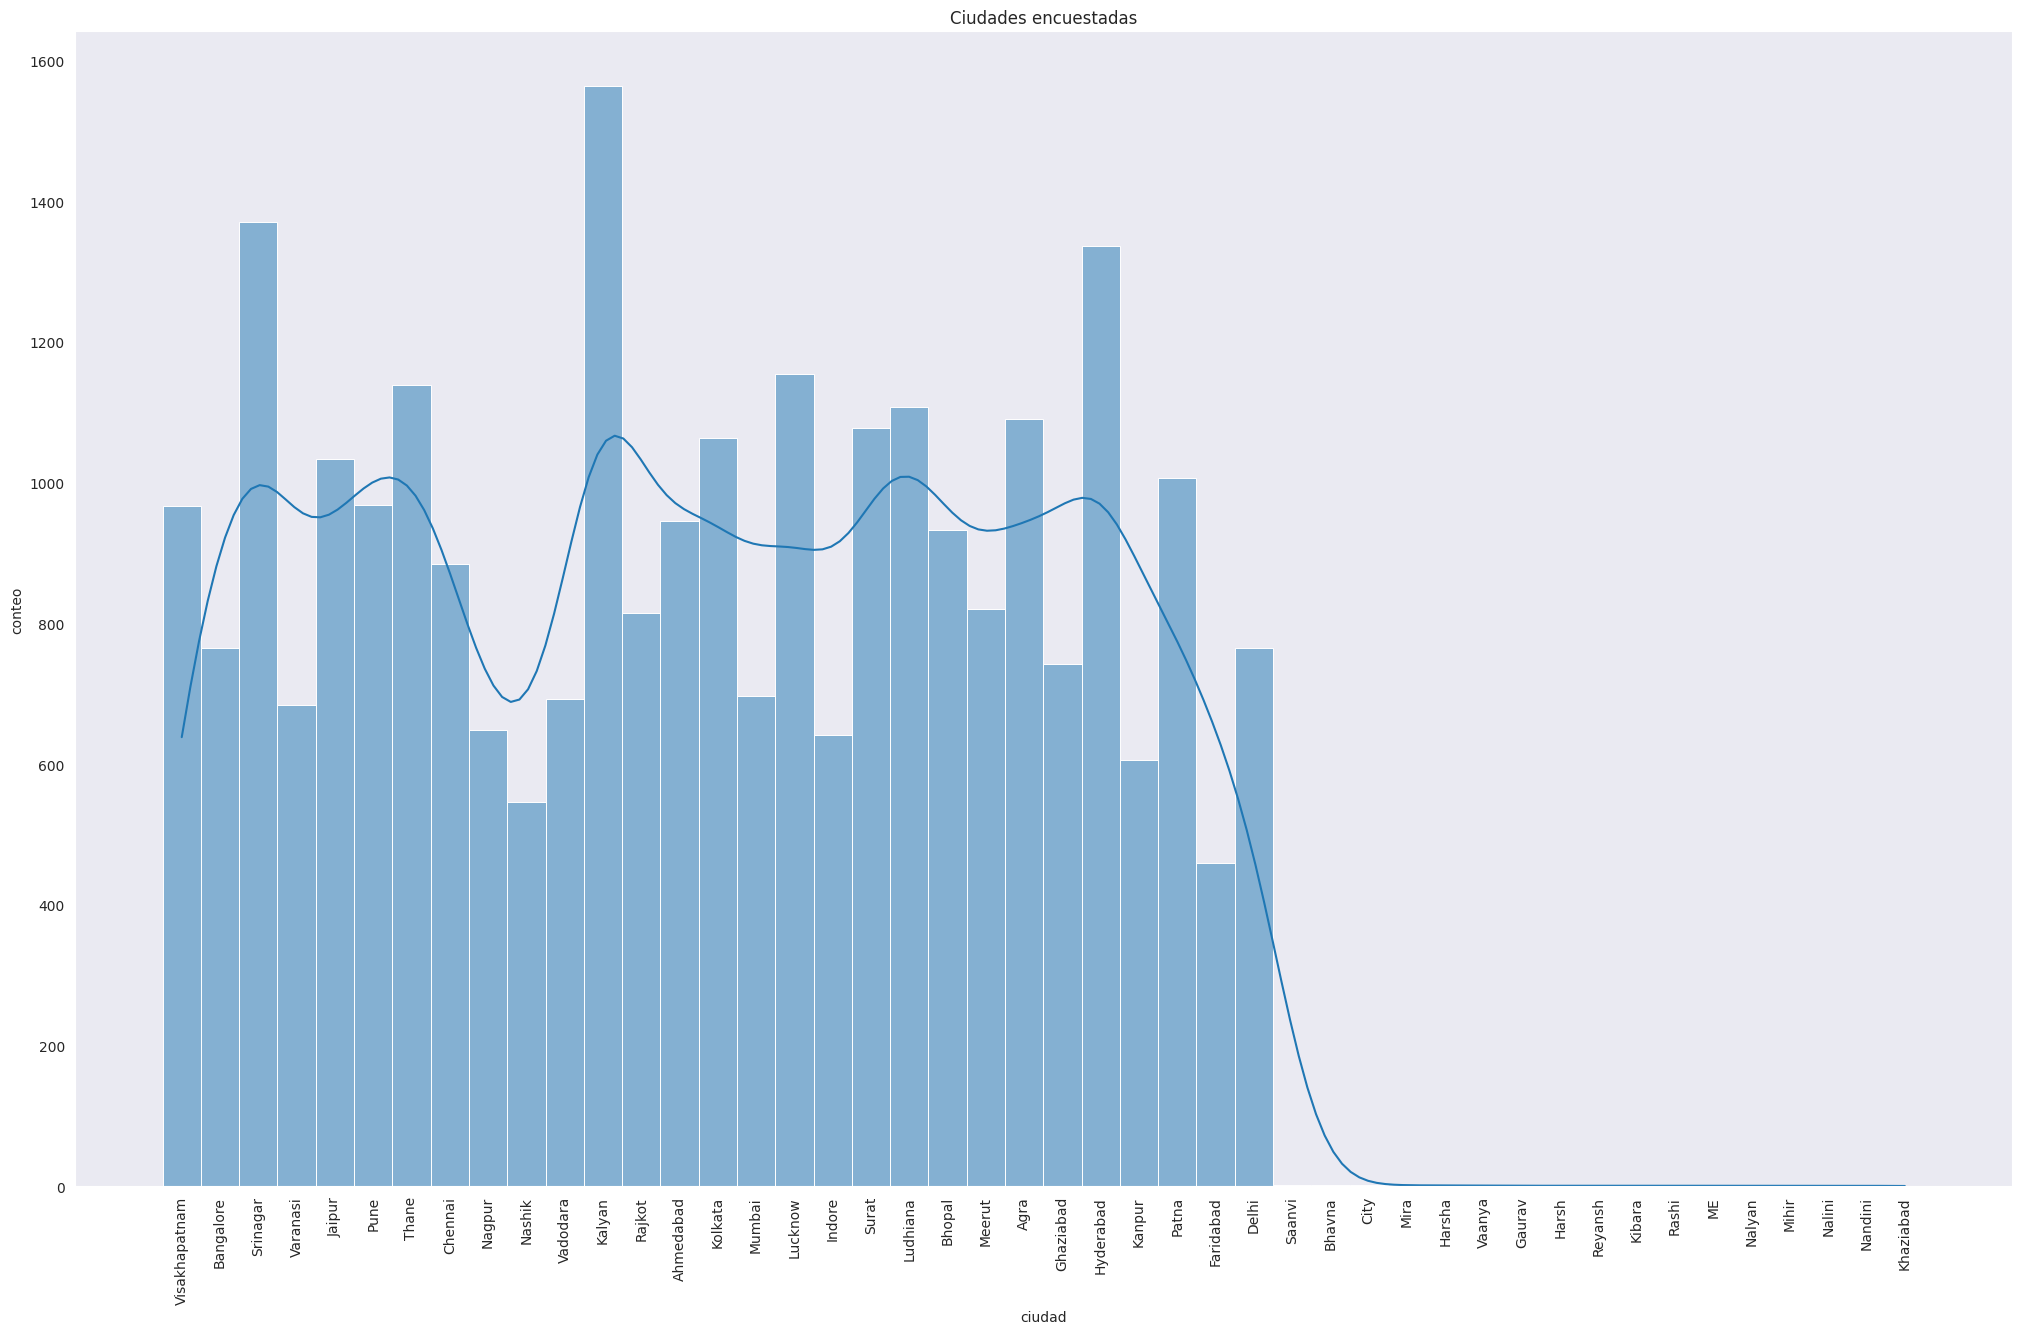

In [ ]:
by_city = df.groupby("City")["City"].count()
by_city.index.name = 'Ciudad'
by_city.rename('Conteo', inplace=True)

fig, ax1 = plt.subplots()
sns.set_style('dark')
sns.histplot(data = df['City'], bins = 25, kde=True, ax = ax1)
ax1.set(
        title="Ciudades encuestadas",
        xlabel = "ciudad",
        ylabel = "conteo")
ax1.tick_params(axis='x', rotation=90)
fig.set_size_inches(25,15)

In [ ]:
by_gender = df.groupby("Gender")["Gender"].count().set_axis(['Mujeres','Hombres'], axis=0)
by_gender.index.name = 'Género'
by_gender.rename('Conteo', inplace=True)

by_gender

,Conteo
Género,
Mujeres,11606
Hombres,14939


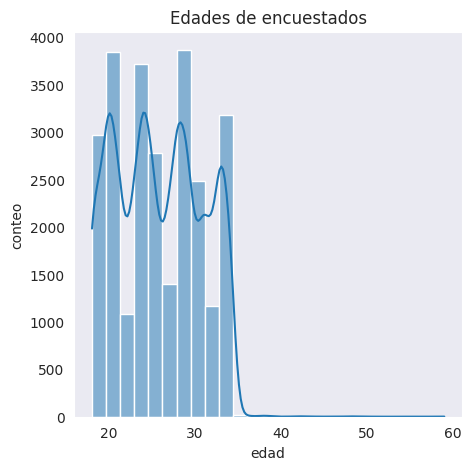

In [ ]:
sns.histplot(data = df['Age'], bins = 25, kde=True, ax = ax1)
ax1.set(
        title="Edades de encuestados",
        xlabel = "edad",
        ylabel = "conteo")
fig.set_size_inches(5,5)

<Axes: title={'center': 'Número de personas con y sin depresión por género'}, xlabel='Género', ylabel='Conteo'>

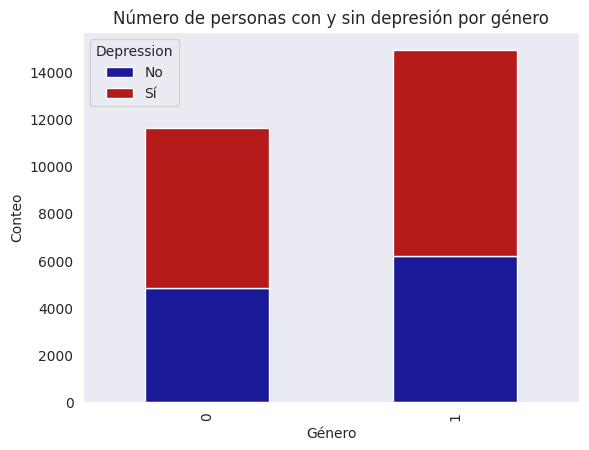

In [ ]:
counts = df.groupby("Gender")['Depression'].value_counts()
counts = counts.rename(index={0:'No', 1:'Sí'}, level='Depression')
counts = counts.rename(index={'Female':'Mujer', 'Male':'Hombre'}, level='Gender')
counts.unstack().plot(kind = "bar", stacked = True, xlabel="Género", ylabel="Conteo", title="Número de personas con y sin depresión por género", color=[(0.1,0.1,0.60),(0.71,0.1,0.1)])
# sns.histplot(data = df, x = "Gender", hue = "Depression", multiple = "stack", legend="a")
#
# counts.info()

<Axes: title={'center': 'Número de personas con y sin depresión por duración de sueño'}, xlabel='Duración de sueño', ylabel='Conteo'>

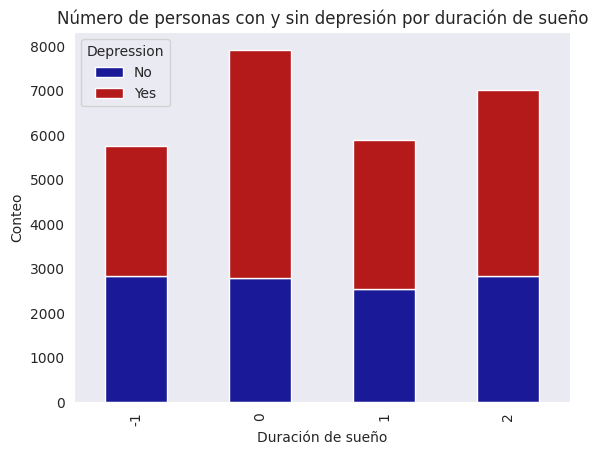

In [ ]:
counts = df.groupby('Sleep_Duration')['Depression'].value_counts()
counts = counts.rename(index={0:'No', 1:'Yes'}, level='Depression')
counts = counts.rename(index={"'5-6 hours'":'5-6 horas', "'7-8 hours'":'7-8 horas', "'Less than 5 hours'": 'Menos de 5 horas', "'More than 8 hours'": 'Más de 8 horas'}, level='Sleep_Duration')
counts.unstack().plot(kind = "bar", stacked = True, xlabel="Duración de sueño", ylabel="Conteo", title="Número de personas con y sin depresión por duración de sueño", color=[(0.1,0.1,0.60),(0.71,0.1,0.1)])

#

In [ ]:
serie_edades = pd.Series(df['Age'])

print(f"Edad promedio: {serie_edades.mean()}")
print(f"Mediana: {serie_edades.median()}")
print(f"Error estandar: {serie_edades.std()}")
print(f"Valor mínimo: {serie_edades.min()}")
print(f"Valor máximo: {serie_edades.max()}")
print(f"Rango: {serie_edades.max() - serie_edades.min()}")

Edad promedio: 25.810698813335843
Mediana: 25.0
Error estandar: 4.902829760462376
Valor mínimo: 18
Valor máximo: 59
Rango: 41


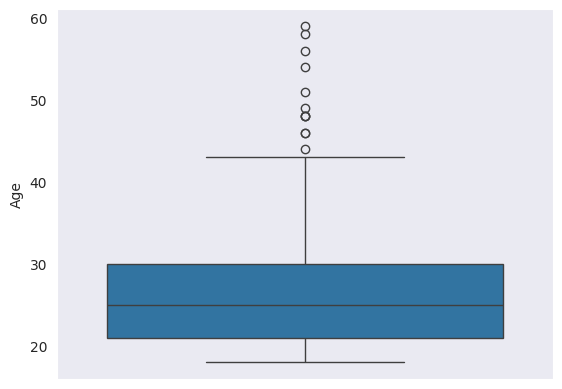

In [ ]:
sns.boxplot(serie_edades)
fig.set_size_inches(10,20)

In [ ]:
q1 = serie_edades.quantile(0.25)
q3 = serie_edades.quantile(0.75)
print(f"q1: {q1}")
print(f"q3: {q3}")
iqr = q3- q1
print(f"iqr: {iqr}")
lower_whisker = q1 - 1.5 * iqr
upper_whisker = q3 + 1.5 * iqr

print(f"Bigote inferior: {lower_whisker}")
print(f"Bigote superior: {upper_whisker}")

q1: 21.0
q3: 30.0
iqr: 9.0
Bigote inferior: 7.5
Bigote superior: 43.5


In [ ]:
lower_whisker = q1 - 1.5 * iqr
upper_whisker = q3 + 1.5 * iqr

print(f"Bigote inferior: {lower_whisker}")
print(f"Bigote superior: {upper_whisker}")

Bigote inferior: 7.5
Bigote superior: 43.5


In [ ]:
outliers = serie_edades[(serie_edades < lower_whisker) | (serie_edades > upper_whisker)]

print(f"Existen {len(outliers)} outliers de un total de {len(serie_edades)} registros")
print("Valores outliers", outliers.values)

Existen 12 outliers de un total de 26545 registros
Valores outliers [58 49 51 44 46 59 54 48 56 46 48 48]


In [ ]:
limite_inferior = serie_edades.quantile(0.025)
limite_superior = serie_edades.quantile(0.975)

print(f"Intervalo al 95% de confianza de la media: {limite_inferior} < {serie_edades.mean()} < {limite_superior}")

Intervalo al 95% de confianza de la media: 18.0 < 25.810698813335843 < 34.0


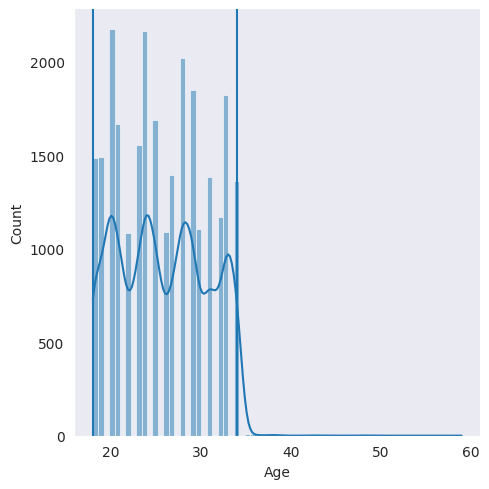

In [ ]:
sns.displot(data = serie_edades, kde = True)
plt.axvline(limite_inferior)
plt.axvline(limite_superior)

### Muestras de datos

In [ ]:
ws_hours = df_clean['Work/Study_Hours']
means = []
for _ in range(10_000):
  sample = ws_hours.sample(n=50,replace = True)
  means.append(sample.mean())
print(means[0].mean())

7.18


In [ ]:
serie_means = pd.Series(means)
# serie_means
print(f"Error estandar: {serie_means.std()}")
print(f"Valor mínimo: {serie_means.min()}")
print(f"Valor máximo: {serie_means.max()}")
print(f"Rango: {serie_means.max() - serie_means.min()}")

Error estandar: 0.5240674923840022
Valor mínimo: 4.98
Valor máximo: 9.04
Rango: 4.059999999999999


<Axes: >

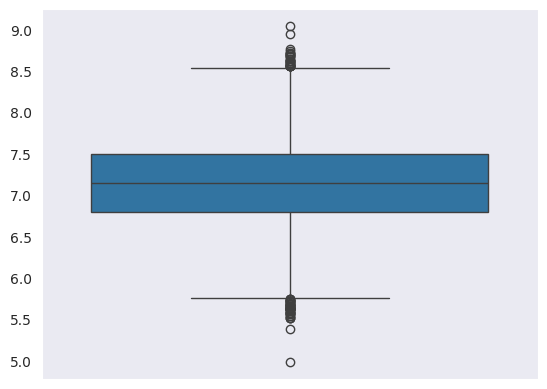

In [ ]:
sns.boxplot(serie_means)

In [ ]:
q1 = serie_means.quantile(0.25)
q3 = serie_means.quantile(0.75)

print(f"q1: {q1}")
print(f"q3: {q3}")

iqr = q3- q1

print(f"iqr:{iqr}")

q1: 6.8
q3: 7.5
iqr:0.7000000000000002


In [ ]:
lower_whisker = q1 - 1.5 * iqr
upper_whisker = q3 + 1.5 * iqr

print(lower_whisker)
print(upper_whisker)

5.75
8.55


In [ ]:
outliers = serie_means[(serie_means < lower_whisker) | (serie_means > upper_whisker)]

print(f"Existen {len(outliers)} outliers de un total de {len(serie_means)} muestras")
print("Valores outliers", outliers.values)

Existen 80 outliers de un total de 10000 muestras
Valores outliers [5.62 5.74 8.72 5.62 5.74 8.64 8.6  5.72 8.6  5.62 8.64 5.6  8.56 5.54
 8.56 9.04 5.58 8.62 8.58 8.7  5.64 8.68 8.58 5.52 5.72 5.68 5.6  5.38
 8.56 5.74 8.62 5.56 8.74 8.56 5.7  5.66 5.66 8.56 8.68 4.98 8.7  5.62
 5.64 5.52 5.66 5.72 5.68 8.56 5.72 5.66 8.68 5.58 5.66 5.52 8.7  8.76
 5.68 5.72 5.64 5.58 5.62 8.68 8.94 5.56 8.72 8.58 5.62 8.56 5.68 8.62
 5.64 5.58 5.62 5.6  5.68 5.54 8.62 5.66 8.62 5.72]


## Heatmap

In [ ]:
df_clean_heat = df_clean.drop(['City'], axis = 1)
df_clean_heat

,Gender,Age,Academic_Pressure,Work_Pressure,CGPA,Study_Satisfaction,Job_Satisfaction,Sleep_Duration,Dietary_Habits,Degree,Suicidal_Thoughts,Work/Study_Hours,Financial_Stress,Family_HMI,Depression
id,,,,,,,,,,,,,,,
2,1,33,5,0,8.97,2,0,1,2,4,1,3,1,0,1
8,0,24,2,0,5.90,5,0,1,1,11,0,3,2,1,0
26,1,31,3,0,7.03,5,0,0,2,6,0,9,1,1,0
30,0,28,3,0,5.59,2,0,2,1,8,1,4,5,1,1
32,0,25,4,0,8.13,3,0,1,1,17,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140685,0,27,5,0,5.75,5,0,1,0,0,1,7,1,1,0
140686,1,27,2,0,9.40,3,0,0,2,25,0,0,3,1,0
140689,1,31,3,0,6.61,4,0,1,0,22,0,12,2,0,0


<Axes: >

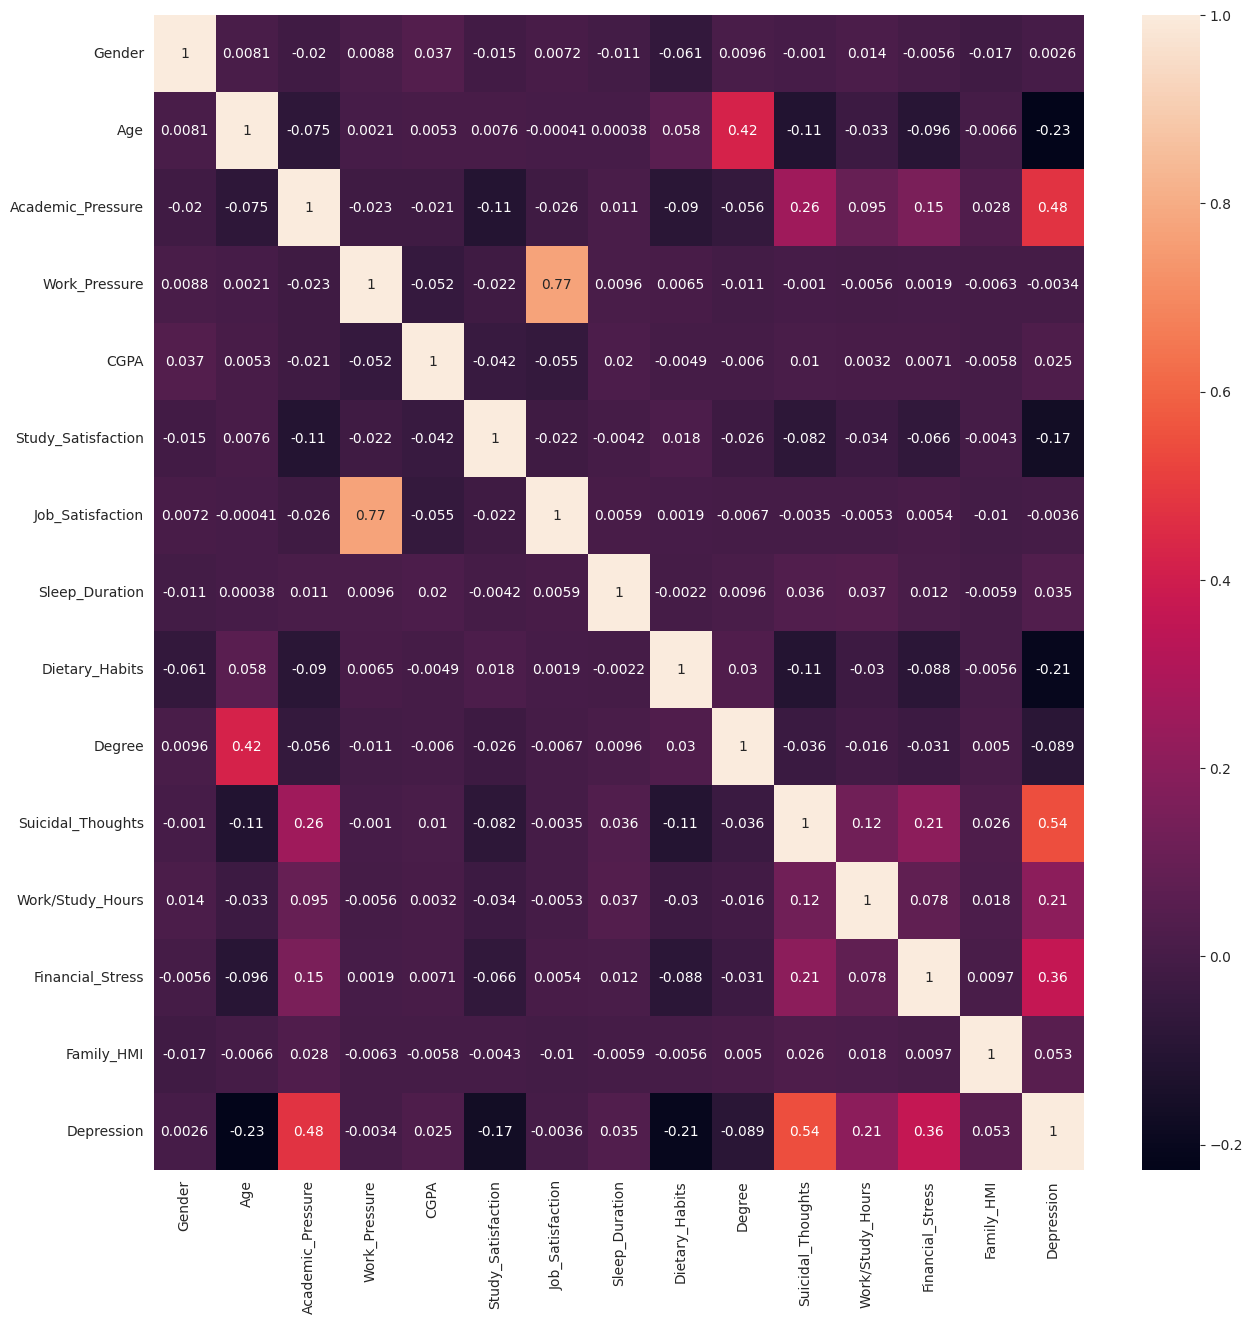

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df_clean_heat.corr(), annot = True)

## Pairplot

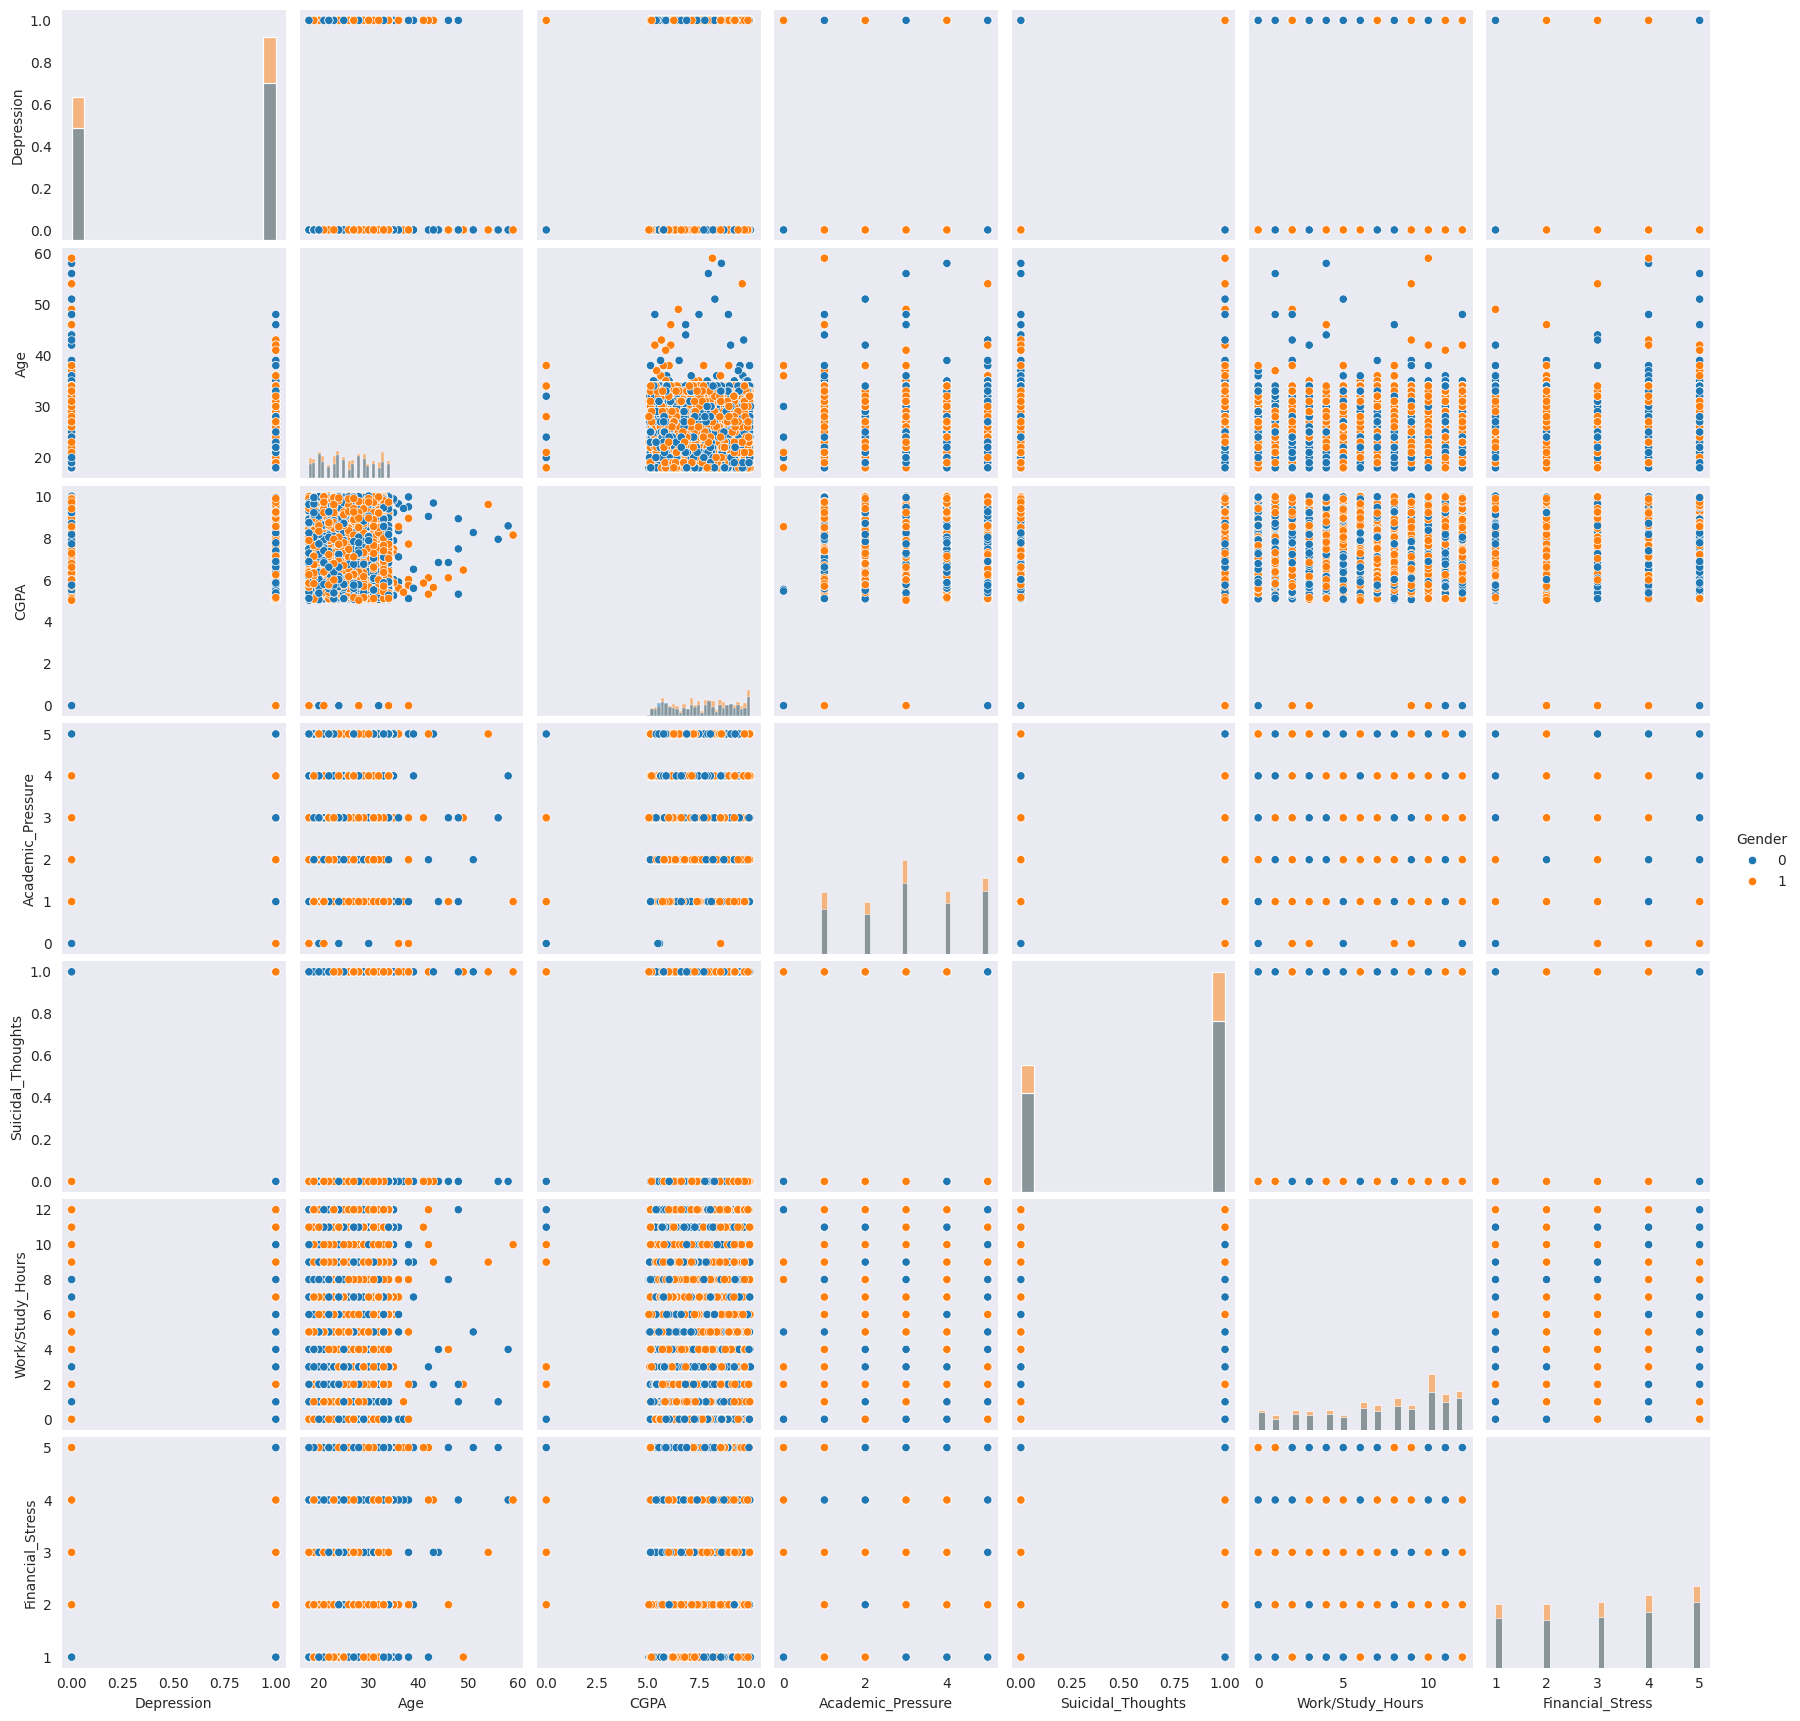

In [ ]:
sns.pairplot(
    df_clean,
    vars = ['Depression','Age','CGPA','Academic_Pressure', 'Suicidal_Thoughts', 'Work/Study_Hours', 'Financial_Stress'],
    hue = "Gender",
    diag_kind = "hist"
)

*No existe correlación entre las variables del dataset que nos permita predecir si un alumno puede o no tener depresión mediante regresión lineal*

## Machine learning

### Test 1

Excluir del modelo únicamente el target y la ciudad

In [ ]:
df_clean

,Gender,Age,City,Academic_Pressure,Work_Pressure,CGPA,Study_Satisfaction,Job_Satisfaction,Sleep_Duration,Dietary_Habits,Degree,Suicidal_Thoughts,Work/Study_Hours,Financial_Stress,Family_HMI,Depression
id,,,,,,,,,,,,,,,,
2,1,33,Visakhapatnam,5,0,8.97,2,0,1,2,4,1,3,1,0,1
8,0,24,Bangalore,2,0,5.90,5,0,1,1,11,0,3,2,1,0
26,1,31,Srinagar,3,0,7.03,5,0,0,2,6,0,9,1,1,0
30,0,28,Varanasi,3,0,5.59,2,0,2,1,8,1,4,5,1,1
32,0,25,Jaipur,4,0,8.13,3,0,1,1,17,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140685,0,27,Surat,5,0,5.75,5,0,1,0,0,1,7,1,1,0
140686,1,27,Ludhiana,2,0,9.40,3,0,0,2,25,0,0,3,1,0
140689,1,31,Faridabad,3,0,6.61,4,0,1,0,22,0,12,2,0,0


In [ ]:
y = df_clean['Depression'] # ¿Tiene depresión o no tiene depresión?
x = df_clean.drop(columns=['Depression','City'])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [ ]:
logreg = LogisticRegression(max_iter = 5000)
logreg.fit(x_train, y_train)

LogisticRegression(max_iter=5000)

In [ ]:
y_predict = logreg.predict(x_test)
y_predict

array([1, 1, 0, ..., 1, 0, 1])

In [ ]:
accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy * 100 : .2f} %")

Accuracy:  85.21 %


### Test 2
Adicional al test anterior, ahora excluiremos el título de cada encuestado para ver si podemos mejorar la precisión de la predicción

In [ ]:
y = df_clean['Depression']
x = df_clean.drop(columns=['Depression','City','Degree'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 42)
logreg = LogisticRegression(max_iter = 5000)
logreg.fit(x_train, y_train)
y_predict = logreg.predict(x_test)
accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy * 100 : .2f} %")

Accuracy:  84.54 %


### Test 3
Incluir solamente variables que eran númericas originalmente y que son resultado de la interpretación del encuestado

In [ ]:
df.head()

,Gender,Age,City,Academic_Pressure,Work_Pressure,CGPA,Study_Satisfaction,Job_Satisfaction,Sleep_Duration,Dietary_Habits,Degree,Suicidal_Thoughts,Work/Study_Hours,Financial_Stress,Family_HMI,Depression
id,,,,,,,,,,,,,,,,
2,1,33,Visakhapatnam,5,0,8.97,2,0,1,2,4,1,3,1,0,1
8,0,24,Bangalore,2,0,5.90,5,0,1,1,11,0,3,2,1,0
26,1,31,Srinagar,3,0,7.03,5,0,0,2,6,0,9,1,1,0
30,0,28,Varanasi,3,0,5.59,2,0,2,1,8,1,4,5,1,1
32,0,25,Jaipur,4,0,8.13,3,0,1,1,17,1,1,1,0,0


In [ ]:
y = df_clean['Depression']
x = df_clean[['Academic_Pressure','Work_Pressure','Study_Satisfaction','Job_Satisfaction','Suicidal_Thoughts','Financial_Stress']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 42)
logreg = LogisticRegression(max_iter = 5000)
logreg.fit(x_train, y_train)
y_predict = logreg.predict(x_test)
accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy * 100 : .2f} %")

Accuracy:  82.46 %


### Test 4
Incluir variables que pudieran afectar la estabilidad mental de una persona

In [ ]:
y = df_clean['Depression']
x = df_clean[['Academic_Pressure','Work_Pressure','Study_Satisfaction','Job_Satisfaction','Financial_Stress','Dietary_Habits','Sleep_Duration','Financial_Stress','Family_HMI','Suicidal_Thoughts']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 42)
logreg = LogisticRegression(max_iter = 5000)
logreg.fit(x_train, y_train)
y_predict = logreg.predict(x_test)
accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy * 100 : .2f} %")

Accuracy:  83.29 %


### Test 5
Incluir variables relacionadas al estilo de vida de las personas

In [ ]:
y = df_clean['Depression']
x = df_clean[['Dietary_Habits','Sleep_Duration', 'Work/Study_Hours']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 42)
logreg = LogisticRegression(max_iter = 5000)
logreg.fit(x_train, y_train)
y_predict = logreg.predict(x_test)
accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy * 100 : .2f} %")

Accuracy:  63.93 %


### Test 6
Incluir únicamente variables relacionadas al ámbito académico de cada encuestado

In [ ]:
y = df_clean['Depression']
x = df_clean[['Academic_Pressure','Study_Satisfaction','CGPA','Degree','Work/Study_Hours']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 42)
logreg = LogisticRegression(max_iter = 5000)
logreg.fit(x_train, y_train)
y_predict = logreg.predict(x_test)
accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy * 100 : .2f} %")

Accuracy:  74.36 %


In [ ]:
Test 7

### Test 7
Predecir si un alumno tiene depresión tomando en cuenta solo las variables con mayor correlación con la variable depresión

In [ ]:
y = df_clean['Depression']
x = df_clean[['Academic_Pressure','Financial_Stress','Suicidal_Thoughts']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 42)
logreg = LogisticRegression(max_iter = 5000)
logreg.fit(x_train, y_train)
y_predict = logreg.predict(x_test)
accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy * 100 : .2f} %")

Accuracy:  81.96 %


### Test 7
Predecir si un alumno puede llegar a tener pensamientos suicidas tomando en las variables numéricas utilizadas en el test 3

In [ ]:
y = df_clean['Suicidal_Thoughts']
x = df_clean[['Academic_Pressure','Work_Pressure','Study_Satisfaction','Job_Satisfaction','Financial_Stress']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)
logreg = LogisticRegression(max_iter = 5000)
logreg.fit(x_train, y_train)
y_predict = logreg.predict(x_test)
accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy * 100 : .2f} %")

Accuracy:  67.55 %


### Test 8
Predecir si un alumno puede llegar a tener pensamientos suicidas excluyendo únicamente las variables Depression, City y Degree del entrenamiento

In [ ]:
df_clean

,Gender,Age,City,Academic_Pressure,Work_Pressure,CGPA,Study_Satisfaction,Job_Satisfaction,Sleep_Duration,Dietary_Habits,Degree,Suicidal_Thoughts,Work/Study_Hours,Financial_Stress,Family_HMI,Depression
id,,,,,,,,,,,,,,,,
2,1,33,Visakhapatnam,5,0,8.97,2,0,1,2,4,1,3,1,0,1
8,0,24,Bangalore,2,0,5.90,5,0,1,1,11,0,3,2,1,0
26,1,31,Srinagar,3,0,7.03,5,0,0,2,6,0,9,1,1,0
30,0,28,Varanasi,3,0,5.59,2,0,2,1,8,1,4,5,1,1
32,0,25,Jaipur,4,0,8.13,3,0,1,1,17,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140685,0,27,Surat,5,0,5.75,5,0,1,0,0,1,7,1,1,0
140686,1,27,Ludhiana,2,0,9.40,3,0,0,2,25,0,0,3,1,0
140689,1,31,Faridabad,3,0,6.61,4,0,1,0,22,0,12,2,0,0


In [ ]:
y = df_clean['Suicidal_Thoughts']
x = df_clean.drop(columns=['Depression','Suicidal_Thoughts','City','Degree'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 42)
logreg = LogisticRegression(max_iter = 5000)
logreg.fit(x_train, y_train)
y_predict = logreg.predict(x_test)
accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy * 100 : .2f} %")

Accuracy:  68.65 %


In [ ]:
y = df_clean['Suicidal_Thoughts']
x = df_clean[['Academic_Pressure','Work_Pressure','Study_Satisfaction','Job_Satisfaction','Financial_Stress','Dietary_Habits','Sleep_Duration','Financial_Stress','Family_HMI']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 42)
logreg = LogisticRegression(max_iter = 5000)
logreg.fit(x_train, y_train)
y_predict = logreg.predict(x_test)
accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy * 100 : .2f} %")

Accuracy:  68.19 %


In [ ]:
y = df_clean['Depression']
x = df_clean.drop(columns=['Depression','City'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 42)
logreg = LogisticRegression(max_iter = 5000)
logreg.fit(x_train, y_train)
y_predict = logreg.predict(x_test)
accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy * 100 : .2f} %")

Accuracy:  84.54 %
